# NBA MVP Machine Learning Project

The Most Valuable Player (MVP) is an award given to a player that has performed the best within the regular season. The MVP is voted upon by a panel of 100 media members, who rank MVP candidates first through fifth.

The way in which the MVP is judged on however, is more complicated than just looking at statistics. It is usually said that the MVP is the best player on the best team however, it is evident a lot of the MVP winners are usually not even the highest ranked team but rather runner up in rankings or even third place. What may be more important is their individual stats and how much impact they have had for their team. If this was true for every case, then some players did not deserve to win MVP over others. Sometimes, the narrative and story of a player who is performing well relative to another MVP candidate may take precedence if the stats are close. Also, factors like voter fatigue i.e. a player winning it multiple years in a row may not be considered the MVP because people may be tired of seeing the player winning or their performance is not valued as much as someone who is also having a fantastic season. All in all, there is more to the MVP award than just stats, but for this project, the statistics will be used to try predict who will win the MVP this season.

In [1]:
import warnings
warnings.filterwarnings('ignore')

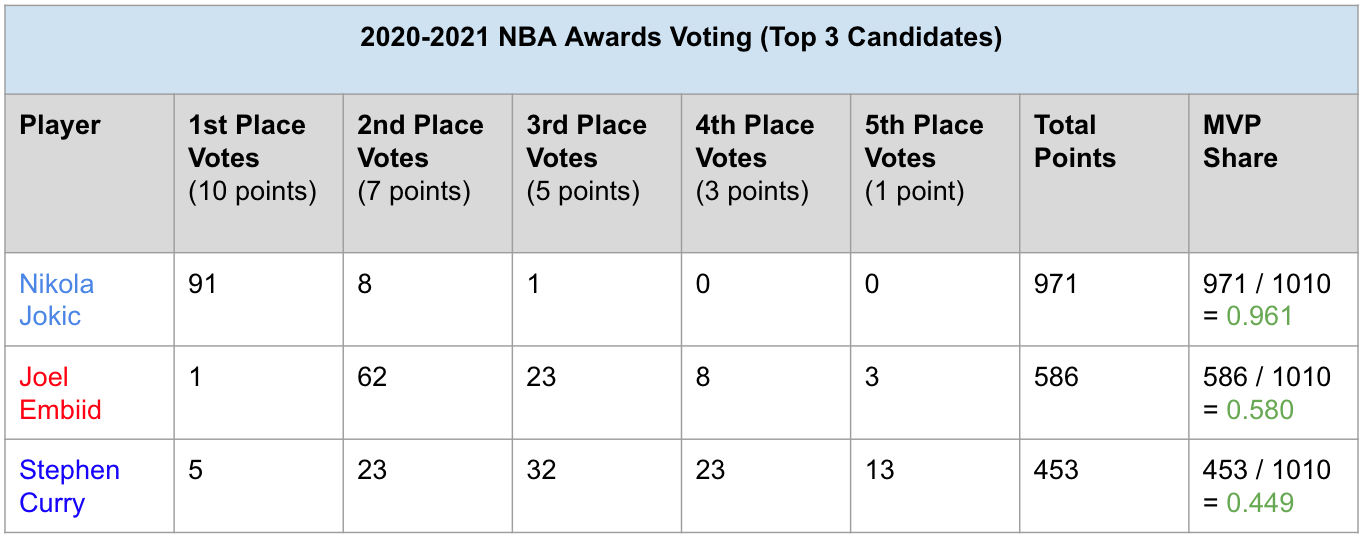

In [2]:
import os
from IPython.display import Image
PATH = r"NBA ML PROJECT\mvp_award_system.png"
Image(filename = PATH, width=600, height=600)

The MVP candidates are voted on and they have an MVP share that is a percentage of their total voting points relative to the total possible voting points. Therefore, for this project, the MVP share will be the variable that is predicted i.e. what will be used to predict who wins the MVP for the season whilst the player and team statistics will be the independent variables that will be used to predict this and thus, seems to be a linear regression problem.

By using historical MVP data and seasonal statistics, the actual MVP winner can be compared to the predicted MVP winner to see how accurate the model is, and if the model is to a good level of accuracy, it can be used to predict this seasons MVP.

Table of Contents:

1. Scrape Relevant Data
2. Data cleaning
3. Exploratory Data Analysis
4. Model
5. Evaluation
6. Combination of Models

## 1. Scrape Relevant Data

The data that is needed for this project is the MVP winners from 2022 to 1980, the individual player stats for all of these years and the team stats as well.

Link 1:https://www.basketball-reference.com/awards/awards_2020.html

- The MVP rankings. Change each year in the url to get all the years up until 1980

Link 2: https://www.basketball-reference.com/leagues/NBA_2022_per_game.html and
 https://www.basketball-reference.com/leagues/NBA_2022_advanced.html

- The regular season player stats and advanced statistics for PER as it is one of the most important stats to determine MVP nowadays. Change each year in the url to get all the years up until 1980

Link 3: https://www.basketball-reference.com/leagues/NBA_2022.html

- The team stats for the season. Change each year in the url to get all the years up until 1980

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

### 1.1 Link 1: MVP Data

In [4]:
# website to be scraped
url = 'https://www.basketball-reference.com/awards/awards_2022.html'
website = requests.get(url).text
soup = BeautifulSoup(website, 'lxml')

In [5]:
# MVP table class
mvp_table = soup.find(id="mvp")

# use pandas to read the whole table in
mvp_table = pd.read_html(str(mvp_table))[0]
mvp_table.columns = mvp_table.columns.droplevel(0)
mvp_table.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1,Nikola Jokić,26,DEN,65.0,875.0,1000,0.875,74,33.5,27.1,13.8,7.9,1.5,0.9,0.583,0.337,0.810,15.2,0.296
1,2,Joel Embiid,27,PHI,26.0,706.0,1000,0.706,68,33.8,30.6,11.7,4.2,1.1,1.5,0.499,0.371,0.814,12.0,0.252
2,3,Giannis Antetokounmpo,27,MIL,9.0,595.0,1000,0.595,67,32.9,29.9,11.6,5.8,1.1,1.4,0.553,0.293,0.722,12.9,0.281
3,4,Devin Booker,25,PHO,0.0,216.0,1000,0.216,68,34.5,26.8,5.0,4.8,1.1,0.4,0.466,0.383,0.868,7.6,0.156
4,5,Luka Dončić,22,DAL,0.0,146.0,1000,0.146,65,35.4,28.4,9.1,8.7,1.2,0.6,0.457,0.353,0.744,7.6,0.159


In [6]:
years = list(range(1980,2023)) # from 1980 to 2022
dfs = list()

In [7]:
for year in years:
    # website to be scraped
    url = f'https://www.basketball-reference.com/awards/awards_{year}.html'
    website = requests.get(url).text
    soup = BeautifulSoup(website, 'lxml')

    # MVP table class
    mvp_table = soup.find(id="mvp")

    # use pandas to read the whole table in
    mvp_table = pd.read_html(str(mvp_table))[0]
    mvp_table.columns = mvp_table.columns.droplevel(0)
    mvp_table['Year'] = year
    dfs.append(mvp_table)

In [8]:
# now combine all dfs into one df
mvp_rankings = pd.concat(dfs, axis=0, ignore_index=True)
mvp_rankings

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Kareem Abdul-Jabbar,32,LAL,147.0,147.0,221,0.665,82,38.3,...,10.8,4.5,1.0,3.4,0.604,0.000,0.765,14.8,0.227,1980
1,2,Julius Erving,29,PHI,31.5,31.5,221,0.143,78,36.1,...,7.4,4.6,2.2,1.8,0.519,0.200,0.787,12.5,0.213,1980
2,3,George Gervin,27,SAS,19.0,19.0,221,0.086,78,37.6,...,5.2,2.6,1.4,1.0,0.528,0.314,0.852,10.6,0.173,1980
3,4,Larry Bird,23,BOS,15.0,15.0,221,0.068,82,36.0,...,10.4,4.5,1.7,0.6,0.474,0.406,0.836,11.2,0.182,1980
4,5T,Tiny Archibald,31,BOS,2.0,2.0,221,0.009,80,35.8,...,2.5,8.4,1.3,0.1,0.482,0.222,0.830,8.9,0.148,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,8,Stephen Curry,33,GSW,0.0,4.0,1000,0.004,64,34.5,...,5.2,6.3,1.3,0.4,0.437,0.380,0.923,8.0,0.173,2022
693,9,Chris Paul,36,PHO,0.0,2.0,1000,0.002,65,32.9,...,4.4,10.8,1.9,0.3,0.493,0.317,0.837,9.4,0.210,2022
694,10T,DeMar DeRozan,32,CHI,0.0,1.0,1000,0.001,76,36.1,...,5.2,4.9,0.9,0.3,0.504,0.352,0.877,8.8,0.154,2022
695,10T,Kevin Durant,33,BRK,0.0,1.0,1000,0.001,55,37.2,...,7.4,6.4,0.9,0.9,0.518,0.383,0.910,8.4,0.198,2022


In [9]:
mvp_rankings.isnull().sum()

Rank        0
Player      0
Age         0
Tm          0
First       0
Pts Won     0
Pts Max     0
Share       0
G           0
MP          0
PTS         0
TRB         0
AST         0
STL         0
BLK         0
FG%         0
3P%        26
FT%         0
WS          0
WS/48       0
Year        0
dtype: int64

In [10]:
# save csv file
mvp_rankings.to_csv('NBA ML PROJECT\MVP Stats\MVP_rankings.csv')

### 1.2 Link 2: Player Stats

In [11]:
dfs_2a = list()

In [12]:
for year in years:
    # website to be scraped
    url = f'https://www.basketball-reference.com/leagues/NBA_{year}_per_game.html'
    website = requests.get(url).text
    soup = BeautifulSoup(website, 'lxml')
    
    # player table class
    player_stats = soup.find(id="per_game_stats")

    # use pandas to read the whole table in
    player_stats = pd.read_html(str(player_stats))[0]
    player_stats['Year'] = year
    dfs_2a.append(player_stats)

In [13]:
# now combine all dfs into one df
player_stats = pd.concat(dfs_2a, axis=0, ignore_index=True)
player_stats

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Kareem Abdul-Jabbar*,C,32,LAL,82,NaN,38.3,10.2,16.9,...,2.3,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8,1980
1,2,Tom Abernethy,PF,25,GSW,67,NaN,18.2,2.3,4.7,...,0.9,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4,1980
2,3,Alvan Adams,C,25,PHO,75,NaN,28.9,6.2,11.7,...,2.1,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9,1980
3,4,Tiny Archibald*,PG,31,BOS,80,80,35.8,4.8,9.9,...,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1,1980
4,5,Dennis Awtrey,C,31,CHI,26,NaN,21.5,1.0,2.3,...,1.1,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23354,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022
23355,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022
23356,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022
23357,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022


In [14]:
# remove repeated headings
player_stats = player_stats[player_stats['Rk'] != 'Rk']

In [15]:
player_stats.isnull().sum()

Rk           0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS         673
MP           0
FG           0
FGA          0
FG%        117
3P           0
3PA          0
3P%       3765
2P           0
2PA          0
2P%        190
eFG%       117
FT           0
FTA          0
FT%       1005
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
Year         0
dtype: int64

In [16]:
dfs_2b = list()

In [17]:
for year in years:
    # website to be scraped
    url = f'https://www.basketball-reference.com/leagues/NBA_{year}_advanced.html'
    website = requests.get(url).text
    soup = BeautifulSoup(website, 'lxml')

    # player table class
    advanced_stats = soup.find(id="advanced_stats")

    # use pandas to read the whole table in
    advanced_stats = pd.read_html(str(advanced_stats))[0]
    advanced_stats['Year'] = year

    dfs_2b.append(advanced_stats)

In [18]:
# now combine all dfs into one df
advanced_stats = pd.concat(dfs_2b, axis=0, ignore_index=True)

In [19]:
# remove repeated headings
advanced_stats = advanced_stats[advanced_stats['Player'] != 'Player']

In [20]:
advanced_stats.isnull().sum()

Rk                 0
Player             0
Pos                0
Age                0
Tm                 0
G                  0
MP                 0
PER                5
TS%              103
3PAr             117
FTr              117
ORB%               5
DRB%               5
TRB%               5
AST%               5
STL%               5
BLK%               5
TOV%              87
USG%               5
Unnamed: 19    22467
OWS                0
DWS                0
WS                 0
WS/48              5
Unnamed: 24    22467
OBPM               0
DBPM               0
BPM                0
VORP               0
Year               0
dtype: int64

In [21]:
advanced_stats = advanced_stats[['Player', 'Tm', 'Year', 'PER']]

In [22]:
advanced_stats.head(1)

,Player,Tm,Year,PER
0,Kareem Abdul-Jabbar*,LAL,1980,25.3


In [23]:
player_stats.shape

(22467, 31)

In [24]:
advanced_stats.shape

(22467, 4)

In [25]:
player_stats = player_stats.merge(advanced_stats, how='inner', on=['Player', 'Year', 'Tm'])

In [26]:
player_stats.shape

(22469, 32)

In [27]:
player_stats.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,PER
0,1,Kareem Abdul-Jabbar*,C,32,LAL,82,NaN,38.3,10.2,16.9,...,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8,1980,25.3
1,2,Tom Abernethy,PF,25,GSW,67,NaN,18.2,2.3,4.7,...,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4,1980,11.0
2,3,Alvan Adams,C,25,PHO,75,NaN,28.9,6.2,11.7,...,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9,1980,19.2
3,4,Tiny Archibald*,PG,31,BOS,80,80,35.8,4.8,9.9,...,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1,1980,15.3
4,5,Dennis Awtrey,C,31,CHI,26,NaN,21.5,1.0,2.3,...,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3,1980,7.4


In [28]:
# save csv file
player_stats.to_csv('NBA ML PROJECT\Player Stats\player_stats.csv')

### 1.3 Link 3: Team Stats

In [29]:
dfs_3 = list()

In [30]:
for year in years:
    # website to be scraped
    url = f'https://www.basketball-reference.com/leagues/NBA_{year}.html'
    website = requests.get(url).text
    soup = BeautifulSoup(website, 'lxml')
    
    # eastern conference team stats
    east = soup.find(id="divs_standings_E")
    
    eastern_conf = pd.read_html(str(east))[0]
    eastern_conf['CONFERENCE'] = 'East'
    eastern_conf['Year'] = year

    # western conference team stats
    west = soup.find(id="divs_standings_W")

    western_conf = pd.read_html(str(west))[0]
    western_conf['CONFERENCE'] = 'West'
    western_conf['Year'] = year

    # merge two conferences
    eastern_conf.rename(columns = {'Eastern Conference':'Team'}, inplace = True)
    western_conf.rename(columns = {'Western Conference':'Team'}, inplace = True)
    team_stats = pd.concat([eastern_conf, western_conf])
    
    dfs_3.append(team_stats)

In [31]:
# now combine all dfs into one df
team_stats = pd.concat(dfs_3, axis=0, ignore_index=True)

In [32]:
team_stats.isnull().sum()

Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
CONFERENCE    0
Year          0
dtype: int64

In [33]:
# save csv file
team_stats.to_csv('./NBA ML PROJECT/Team Stats/team_stats.csv')

## 2. Data Cleaning

### 2.1 MVP

In [34]:
mvp = pd.read_csv('./NBA ML PROJECT/MVP Stats/MVP_rankings.csv')

In [35]:
mvp.columns

Index(['Unnamed: 0', 'Rank', 'Player', 'Age', 'Tm', 'First', 'Pts Won',
       'Pts Max', 'Share', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%',
       '3P%', 'FT%', 'WS', 'WS/48', 'Year'],
      dtype='object')

In [36]:
del mvp['Unnamed: 0']

In [37]:
# filter out data thats unique to this table as the rest will be in the player stats and data that can be used to merge
mvp = mvp[['Player', 'Year', 'Pts Won', 'Pts Max', 'Share']]

In [38]:
mvp.head(10)

,Player,Year,Pts Won,Pts Max,Share
0,Kareem Abdul-Jabbar,1980,147.0,221,0.665
1,Julius Erving,1980,31.5,221,0.143
2,George Gervin,1980,19.0,221,0.086
3,Larry Bird,1980,15.0,221,0.068
4,Tiny Archibald,1980,2.0,221,0.009
5,Dennis Johnson,1980,2.0,221,0.009
6,Dan Roundfield,1980,2.0,221,0.009
7,Gus Williams,1980,1.5,221,0.007
8,Moses Malone,1980,1.0,221,0.005
9,Julius Erving,1981,454.0,690,0.658


In [39]:
mvp_list = []
for year in years:
    x = mvp[mvp['Year'] == year]
    x['Rank'] = list(range(1,x.shape[0]+1))
    mvp_list.append(x)
mvps = pd.concat(mvp_list)
mvps

,Player,Year,Pts Won,Pts Max,Share,Rank
0,Kareem Abdul-Jabbar,1980,147.0,221,0.665,1
1,Julius Erving,1980,31.5,221,0.143,2
2,George Gervin,1980,19.0,221,0.086,3
3,Larry Bird,1980,15.0,221,0.068,4
4,Tiny Archibald,1980,2.0,221,0.009,5
...,...,...,...,...,...,...
692,Stephen Curry,2022,4.0,1000,0.004,8
693,Chris Paul,2022,2.0,1000,0.002,9
694,DeMar DeRozan,2022,1.0,1000,0.001,10
695,Kevin Durant,2022,1.0,1000,0.001,11


### 2.2 Players

In [40]:
players = pd.read_csv('./NBA ML PROJECT/Player Stats/player_stats.csv')

In [41]:
players.shape

(22469, 33)

In [42]:
players.head(50)

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,PER
0,0,1,Kareem Abdul-Jabbar*,C,32,LAL,82,NaN,38.3,10.2,...,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8,1980,25.3
1,1,2,Tom Abernethy,PF,25,GSW,67,NaN,18.2,2.3,...,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4,1980,11.0
2,2,3,Alvan Adams,C,25,PHO,75,NaN,28.9,6.2,...,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9,1980,19.2
3,3,4,Tiny Archibald*,PG,31,BOS,80,80.0,35.8,4.8,...,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1,1980,15.3
4,4,5,Dennis Awtrey,C,31,CHI,26,NaN,21.5,1.0,...,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3,1980,7.4
5,5,6,Gus Bailey,SG,28,WSB,20,NaN,9.0,0.8,...,1.1,1.4,1.3,0.4,0.2,0.6,0.9,1.9,1980,9.3
6,6,7,James Bailey,PF,22,SEA,67,NaN,10.8,1.8,...,1.9,2.9,0.4,0.3,0.8,1.2,1.7,4.7,1980,12.3
7,7,8,Greg Ballard,SF,25,WSB,82,NaN,29.7,6.6,...,4.9,7.8,1.9,1.1,0.4,1.6,2.4,15.6,1980,18.1
8,8,9,Mike Bantom,SF,28,IND,77,NaN,30.3,5.0,...,3.4,5.9,3.6,1.1,0.6,2.5,3.5,11.8,1980,13.7
9,9,10,Marvin Barnes,PF,27,SDC,20,NaN,14.4,1.2,...,2.2,3.9,0.9,0.3,0.6,0.9,2.6,3.2,1980,8.2


In [43]:
players.columns

Index(['Unnamed: 0', 'Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Year', 'PER'],
      dtype='object')

In [44]:
# remove useless column
del players['Unnamed: 0']

In [45]:
# get rid of asterisk in names
players['Player'] = players['Player'].str.replace('*', '', regex=False)
players['Player'].head(10)

0    Kareem Abdul-Jabbar
1          Tom Abernethy
2            Alvan Adams
3         Tiny Archibald
4          Dennis Awtrey
5             Gus Bailey
6           James Bailey
7           Greg Ballard
8            Mike Bantom
9          Marvin Barnes
Name: Player, dtype: object

In [46]:
players.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'PER'],
      dtype='object')

#### Get rid of player duplicates from different teams

In [47]:
players[(players['Player'] == 'James Harden') & (players['Year'] == 2022)]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,PER
21939,218,James Harden,PG,32,TOT,65,65.0,37.2,6.3,15.3,...,6.8,7.7,10.3,1.3,0.6,4.4,2.4,22.0,2022,20.9
21940,218,James Harden,PG,32,BRK,44,44.0,37.0,6.6,16.0,...,7.0,8.0,10.2,1.3,0.7,4.8,2.4,22.5,2022,20.4
21941,218,James Harden,PG,32,PHI,21,21.0,37.7,5.5,13.6,...,6.5,7.1,10.5,1.2,0.2,3.4,2.3,21.0,2022,21.8


In [48]:
grouped_players = players.groupby(['Player', 'Year'])
grouped_players.get_group(('James Harden', 2022))

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,PER
21939,218,James Harden,PG,32,TOT,65,65.0,37.2,6.3,15.3,...,6.8,7.7,10.3,1.3,0.6,4.4,2.4,22.0,2022,20.9
21940,218,James Harden,PG,32,BRK,44,44.0,37.0,6.6,16.0,...,7.0,8.0,10.2,1.3,0.7,4.8,2.4,22.5,2022,20.4
21941,218,James Harden,PG,32,PHI,21,21.0,37.7,5.5,13.6,...,6.5,7.1,10.5,1.2,0.2,3.4,2.3,21.0,2022,21.8


Goes in chronological order i.e. the index at the bottom is the latest team he played for.

In [49]:
def team_duplicates(df):
    if df.shape[0] == 1: # df.shape[0] gives number of rows
        return df
    else:
        row = df[df['Tm'] == 'TOT']
        row['Tm'] = df.iloc[-1,:]['Tm'] # gives the team in the last row i.e. most recent team for that season abd reolaces TOT
        return row

In [50]:
grouped_players = grouped_players.apply(team_duplicates)

In [51]:
grouped_players[grouped_players['Player'] == 'James Harden']

Rk        Player    Pos  Age   Tm   G    GS    MP  \
Player       Year                                                             
James Harden 2010 14378  177  James Harden     SG   20  OKC  76   0.0  22.9   
             2011 15010  186  James Harden     SG   21  OKC  82   5.0  26.7   
             2012 15582  189  James Harden     SG   22  OKC  62   2.0  31.4   
             2013 16129  170  James Harden     SG   23  HOU  78  78.0  38.3   
             2014 16746  187  James Harden     SG   24  HOU  73  73.0  38.0   
             2015 17357  198  James Harden     SG   25  HOU  81  81.0  36.8   
             2016 17962  178  James Harden     SG   26  HOU  82  82.0  38.1   
             2017 18545  173  James Harden     PG   27  HOU  81  81.0  36.4   
             2018 19162  195  James Harden     SG   28  HOU  72  72.0  35.4   
             2019 19863  207  James Harden     PG   29  HOU  78  78.0  36.8   
             2020 20559  199  James Harden     SG   30  HOU  68  68.0  36.5   
             2021 21210  201  James Harden  PG-SG   31  BRK  44  43.0  36.6   
             2022 21939  218  James Harden     PG   32  PHI  65  65.0  37.2   

                           FG   FGA  ...  DRB  TRB   AST  STL  BLK  TOV   PF  \
Player       Year                    ...                                       
James Harden 2010 14378   3.1   7.6  ...  2.6  3.2   1.8  1.1  0.3  1.4  2.6   
             2011 15010   3.6   8.3  ...  2.6  3.1   2.1  1.1  0.3  1.3  2.5   
             2012 15582   5.0  10.1  ...  3.6  4.1   3.7  1.0  0.2  2.2  2.4   
             2013 16129   7.5  17.1  ...  4.1  4.9   5.8  1.8  0.5  3.8  2.3   
             2014 16746   7.5  16.5  ...  3.9  4.7   6.1  1.6  0.4  3.6  2.4   
             2015 17357   8.0  18.1  ...  4.7  5.7   7.0  1.9  0.7  4.0  2.6   
             2016 17962   8.7  19.7  ...  5.3  6.1   7.5  1.7  0.6  4.6  2.8   
             2017 18545   8.3  18.9  ...  7.0  8.1  11.2  1.5  0.5  5.7  2.7   
             2018 19162   9.0  20.1  ...  4.8  5.4   8.8  1.8  0.7  4.4  2.3   
             2019 19863  10.8  24.5  ...  5.8  6.6   7.5  2.0  0.7  5.0  3.1   
             2020 20559   9.9  22.3  ...  5.5  6.6   7.5  1.8  0.9  4.5  3.3   
             2021 21210   7.8  16.7  ...  7.1  7.9  10.8  1.2  0.8  4.0  2.3   
             2022 21939   6.3  15.3  ...  6.8  7.7  10.3  1.3  0.6  4.4  2.4   

                          PTS  Year   PER  
Player       Year                          
James Harden 2010 14378   9.9  2010  14.0  
             2011 15010  12.2  2011  16.4  
             2012 15582  16.8  2012  21.1  
             2013 16129  25.9  2013  22.9  
             2014 16746  25.4  2014  23.5  
             2015 17357  27.4  2015  26.7  
             2016 17962  29.0  2016  25.3  
             2017 18545  29.1  2017  27.4  
             2018 19162  30.4  2018  29.8  
             2019 19863  36.1  2019  30.6  
             2020 20559  34.3  2020  29.1  
             2021 21210  24.6  2021  24.5  
             2022 21939  22.0  2022  20.9  

[13 rows x 32 columns]

In [52]:
grouped_players.index = grouped_players.index.droplevel()

In [53]:
grouped_players.head(1)

,,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,PER
Year,,,,,,,,,,,,,,,,,,,,,,
1986,2302,98,A.C. Green,PF,22,LAL,82,1.0,18.8,2.5,4.7,...,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986,11.8


In [54]:
grouped_players.index = grouped_players.index.droplevel()

In [55]:
grouped_players.head(1)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,PER
2302,98,A.C. Green,PF,22,LAL,82,1.0,18.8,2.5,4.7,...,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986,11.8


In [56]:
player = grouped_players.copy()

### 2.3 Combining MVP and Player Datasets

In [57]:
print(player.head(1))
print(mvp.head(1))

      Rk      Player Pos  Age   Tm   G   GS    MP   FG  FGA  ...  DRB  TRB  \
2302  98  A.C. Green  PF   22  LAL  82  1.0  18.8  2.5  4.7  ...  2.7  4.6   

      AST  STL  BLK  TOV   PF  PTS  Year   PER  
2302  0.7  0.6  0.6  1.2  2.8  6.4  1986  11.8  

[1 rows x 32 columns]
                Player  Year  Pts Won  Pts Max  Share
0  Kareem Abdul-Jabbar  1980    147.0      221  0.665


In [58]:
# join full player dataset with mvp dataset for those who were voted for mvp. Those who did not will simply be NaN.
combined = player.merge(mvp, left_on=['Player', 'Year'] , right_on=['Player', 'Year'], how='outer')

In [59]:
combined[combined['Player'] == 'Michael Jordan']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Year,PER,Pts Won,Pts Max,Share
12300,143.0,Michael Jordan,SG,21.0,CHI,82.0,82.0,38.3,10.2,19.8,...,2.4,0.8,3.5,3.5,28.2,1985,25.8,134.0,780.0,0.172
12301,145.0,Michael Jordan,SG,22.0,CHI,18.0,7.0,25.1,8.3,18.2,...,2.1,1.2,2.5,2.6,22.7,1986,27.5,NaN,NaN,NaN
12302,141.0,Michael Jordan,SG,23.0,CHI,82.0,82.0,40.0,13.4,27.8,...,2.9,1.5,3.3,2.9,37.1,1987,29.8,449.0,780.0,0.576
12303,146.0,Michael Jordan,SG,24.0,CHI,82.0,82.0,40.4,13.0,24.4,...,3.2,1.6,3.1,3.3,35.0,1988,31.7,665.0,800.0,0.831
12304,163.0,Michael Jordan,SG,25.0,CHI,81.0,81.0,40.2,11.9,22.2,...,2.9,0.8,3.6,3.0,32.5,1989,31.1,598.8,850.0,0.704
12305,169.0,Michael Jordan,SG,26.0,CHI,82.0,82.0,39.0,12.6,24.0,...,2.8,0.7,3.0,2.9,33.6,1990,31.2,564.0,920.0,0.613
12306,175.0,Michael Jordan,SG,27.0,CHI,82.0,82.0,37.0,12.1,22.4,...,2.7,1.0,2.5,2.8,31.5,1991,31.6,891.0,960.0,0.928
12307,180.0,Michael Jordan,SG,28.0,CHI,80.0,80.0,38.8,11.8,22.7,...,2.3,0.9,2.5,2.5,30.1,1992,27.7,900.0,960.0,0.938
12308,177.0,Michael Jordan,SG,29.0,CHI,78.0,78.0,39.3,12.7,25.7,...,2.8,0.8,2.7,2.4,32.6,1993,29.7,565.0,980.0,0.577
12309,186.0,Michael Jordan,SG,31.0,CHI,17.0,17.0,39.3,9.8,23.8,...,1.8,0.8,2.1,2.8,26.9,1995,22.1,12.0,1050.0,0.011


In [60]:
combined.isnull().sum()

Rk             1
Player         0
Pos            1
Age            1
Tm             1
G              1
GS           544
MP             1
FG             1
FGA            1
FG%           64
3P             1
3PA            1
3P%         2740
2P             1
2PA            1
2P%          107
eFG%          64
FT             1
FTA            1
FT%          585
ORB            1
DRB            1
TRB            1
AST            1
STL            1
BLK            1
TOV            1
PF             1
PTS            1
Year           0
PER            4
Pts Won    17548
Pts Max    17548
Share      17548
dtype: int64

In [61]:
combined[combined['Rk'].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Year,PER,Pts Won,Pts Max,Share
18244,NaN,George Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1981,NaN,3.0,690.0,0.004


In [62]:
player[player['Player'] == 'George Johnson']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,PER
1616,127,George Johnson,SF,27,IND,81,20.0,25.6,5.1,10.9,...,4.0,5.7,2.4,1.0,0.6,2.3,3.2,13.0,1984,15.3


In [63]:
mvp[mvp['Player'] == 'George Johnson']

,Player,Year,Pts Won,Pts Max,Share
34,George Johnson,1981,3.0,690,0.004


In [64]:
combined[combined['Player'] == 'George Johnson']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Year,PER,Pts Won,Pts Max,Share
6290,127.0,George Johnson,SF,27.0,IND,81.0,20.0,25.6,5.1,10.9,...,1.0,0.6,2.3,3.2,13.0,1984,15.3,NaN,NaN,NaN
18244,NaN,George Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1981,NaN,3.0,690.0,0.004


In [65]:
# drop NaN George Johnson as we do not have his player stats
combined.drop(combined[combined['Rk'].isnull()].index, inplace=True)

In [66]:
# Replace NaN in combined table with 0
combined[['Pts Won', 'Pts Max', 'Share']] = combined[['Pts Won', 'Pts Max', 'Share']].fillna(0)

In [67]:
combined.isnull().sum()

Rk            0
Player        0
Pos           0
Age           0
Tm            0
G             0
GS          543
MP            0
FG            0
FGA           0
FG%          63
3P            0
3PA           0
3P%        2739
2P            0
2PA           0
2P%         106
eFG%         63
FT            0
FTA           0
FT%         584
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
PER           3
Pts Won       0
Pts Max       0
Share         0
dtype: int64

In [68]:
# sort out games played column
combined['Year'][combined['GS'].isnull()].unique()

array([1980, 1981], dtype=int64)

For the years 1980 and 1981, the GS are not given therefore will wait to try and combine it with the team stats as that is the only thing we can use for these two years

### 2.4 Teams

In [69]:
teams = pd.read_csv('./NBA ML PROJECT/Team Stats/team_stats.csv')

In [70]:
teams

,Unnamed: 0,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,CONFERENCE,Year
0,0,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,East,1980
1,1,Boston Celtics*,61,21,.744,—,113.5,105.7,7.37,East,1980
2,2,Philadelphia 76ers*,59,23,.720,2.0,109.1,104.9,4.04,East,1980
3,3,Washington Bullets*,39,43,.476,22.0,107.0,109.5,-2.27,East,1980
4,4,New York Knicks,39,43,.476,22.0,114.0,115.1,-0.96,East,1980
...,...,...,...,...,...,...,...,...,...,...,...
1397,1397,Memphis Grizzlies*,56,26,.683,—,115.6,109.9,5.37,West,2022
1398,1398,Dallas Mavericks*,52,30,.634,4.0,108.0,104.7,3.12,West,2022
1399,1399,New Orleans Pelicans*,36,46,.439,20.0,109.3,110.3,-0.84,West,2022
1400,1400,San Antonio Spurs,34,48,.415,22.0,113.2,113.0,0.02,West,2022


In [71]:
teams[(teams['Year'] == 2022) & (teams['CONFERENCE'] == 'East')].sort_values(['W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS'], ascending=[False, True, False, False, False, False, False])

,Unnamed: 0,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,CONFERENCE,Year
1378,1378,Southeast Division,Southeast Division,Southeast Division,Southeast Division,Southeast Division,Southeast Division,Southeast Division,Southeast Division,East,2022
1372,1372,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,East,2022
1366,1366,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,East,2022
1379,1379,Miami Heat*,53,29,.646,—,110.0,105.6,4.23,East,2022
1373,1373,Milwaukee Bucks*,51,31,.622,—,115.5,112.1,3.22,East,2022
1367,1367,Boston Celtics*,51,31,.622,—,111.8,104.5,7.02,East,2022
1368,1368,Philadelphia 76ers*,51,31,.622,—,109.9,107.3,2.57,East,2022
1369,1369,Toronto Raptors*,48,34,.585,3.0,109.4,107.1,2.38,East,2022
1374,1374,Chicago Bulls*,46,36,.561,5.0,111.6,112.0,-0.38,East,2022
1370,1370,Brooklyn Nets*,44,38,.537,7.0,112.9,112.1,0.82,East,2022


In [72]:
teams.columns

Index(['Unnamed: 0', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS',
       'CONFERENCE', 'Year'],
      dtype='object')

In [73]:
# remove useless column
del teams['Unnamed: 0']

In [74]:
teams.dtypes

Team          object
W             object
L             object
W/L%          object
GB            object
PS/G          object
PA/G          object
SRS           object
CONFERENCE    object
Year           int64
dtype: object

In [75]:
# get rid of asterisk in teams
teams['Team'] = teams['Team'].str.replace('*', '', regex=False)
teams['Team'].head(1)

0    Atlantic Division
Name: Team, dtype: object

In [76]:
# get rid of bracket with number 
import re
teams['Team'] = [re.sub(r'\([^()]*\)', '', name) for name in teams['Team']]

In [77]:
teams['Team'].unique()

array(['Atlantic Division', 'Boston Celtics', 'Philadelphia 76ers',
       'Washington Bullets', 'New York Knicks', 'New Jersey Nets',
       'Central Division', 'Atlanta Hawks', 'Houston Rockets',
       'San Antonio Spurs', 'Indiana Pacers', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Midwest Division', 'Milwaukee Bucks',
       'Kansas City Kings', 'Denver Nuggets', 'Chicago Bulls',
       'Utah Jazz', 'Pacific Division', 'Los Angeles Lakers',
       'Seattle SuperSonics', 'Phoenix Suns', 'Portland Trail Blazers',
       'San Diego Clippers', 'Golden State Warriors', 'Dallas Mavericks',
       'Los Angeles Clippers', 'Sacramento Kings', 'Charlotte Hornets',
       'Miami Heat', 'Orlando Magic', 'Minnesota Timberwolves',
       'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Southeast Division',
       'Charlotte Bobcats', 'Northwest Division', 'Southwest Division',
       'New Orleans/Oklahoma City Hornets', '

In [78]:
# remove \xa0
teams['Team'] = [re.sub(r'\xa0', '', name) for name in teams['Team']]

In [79]:
teams['Team'].unique()

array(['Atlantic Division', 'Boston Celtics', 'Philadelphia 76ers',
       'Washington Bullets', 'New York Knicks', 'New Jersey Nets',
       'Central Division', 'Atlanta Hawks', 'Houston Rockets',
       'San Antonio Spurs', 'Indiana Pacers', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Midwest Division', 'Milwaukee Bucks',
       'Kansas City Kings', 'Denver Nuggets', 'Chicago Bulls',
       'Utah Jazz', 'Pacific Division', 'Los Angeles Lakers',
       'Seattle SuperSonics', 'Phoenix Suns', 'Portland Trail Blazers',
       'San Diego Clippers', 'Golden State Warriors', 'Dallas Mavericks',
       'Los Angeles Clippers', 'Sacramento Kings', 'Charlotte Hornets',
       'Miami Heat', 'Orlando Magic', 'Minnesota Timberwolves',
       'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Southeast Division',
       'Charlotte Bobcats', 'Northwest Division', 'Southwest Division',
       'New Orleans/Oklahoma City Hornets', '

In [80]:
combined['Tm'].unique()

array(['LAL', 'PHO', 'DAL', 'MIA', 'CLE', 'WSB', 'CHI', 'GSW', 'IND',
       'WAS', 'MIN', 'BOS', 'HOU', 'DEN', 'ORL', 'NOH', 'TOR', 'SAC',
       'CHO', 'PHI', 'POR', 'DET', 'OKC', 'UTA', 'MIL', 'VAN', 'SEA',
       'NJN', 'NOK', 'LAC', 'ATL', 'CHA', 'MEM', 'NYK', 'SDC', 'NOP',
       'BRK', 'SAS', 'CHH', 'KCK'], dtype=object)

#### 2.4.1 Abbreviations and Full Team Names 

In [81]:
nicknames = {}

with open('./NBA ML PROJECT/Team Stats/abbreviations.csv') as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev, name = line.replace('\n', '').split(',')
        nicknames[abbrev] = name

In [82]:
nicknames

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [83]:
combined['Team'] = combined['Tm'].map(nicknames)

In [84]:
combined.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,BLK,TOV,PF,PTS,Year,PER,Pts Won,Pts Max,Share,Team
0,98.0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,...,0.6,1.2,2.8,6.4,1986,11.8,0.0,0.0,0.0,Los Angeles Lakers
1,100.0,A.C. Green,PF,23.0,LAL,79.0,72.0,28.4,4.0,7.4,...,1.0,1.3,2.2,10.8,1987,15.7,0.0,0.0,0.0,Los Angeles Lakers
2,103.0,A.C. Green,PF,24.0,LAL,82.0,64.0,32.1,3.9,7.8,...,0.5,1.5,2.5,11.4,1988,14.5,0.0,0.0,0.0,Los Angeles Lakers


#### 2.4.2 Combine combined data with team stats

In [85]:
fullstats = combined.merge(teams, left_on=['Team', 'Year'] , right_on=['Team', 'Year'], how='outer')

In [86]:
fullstats

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,CONFERENCE
0,98.0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,...,0.000,Los Angeles Lakers,62,20,.756,—,117.3,109.5,6.84,West
1,244.0,Byron Scott,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,...,0.000,Los Angeles Lakers,62,20,.756,—,117.3,109.5,6.84,West
2,323.0,James Worthy,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,...,0.009,Los Angeles Lakers,62,20,.756,—,117.3,109.5,6.84,West
3,114.0,Jerome Henderson,C,26.0,LAL,1.0,0.0,3.0,2.0,3.0,...,0.000,Los Angeles Lakers,62,20,.756,—,117.3,109.5,6.84,West
4,1.0,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,...,0.173,Los Angeles Lakers,62,20,.756,—,117.3,109.5,6.84,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,East
18459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Southeast Division,Southeast Division,Southeast Division,Southeast Division,Southeast Division,Southeast Division,Southeast Division,Southeast Division,East
18460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Northwest Division,Northwest Division,Northwest Division,Northwest Division,Northwest Division,Northwest Division,Northwest Division,Northwest Division,West
18461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,West


In [87]:
fullstats.drop(fullstats[fullstats['Player'].isnull()].index, inplace=True)

In [88]:
fullstats

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,CONFERENCE
0,98.0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,...,0.000,Los Angeles Lakers,62,20,.756,—,117.3,109.5,6.84,West
1,244.0,Byron Scott,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,...,0.000,Los Angeles Lakers,62,20,.756,—,117.3,109.5,6.84,West
2,323.0,James Worthy,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,...,0.009,Los Angeles Lakers,62,20,.756,—,117.3,109.5,6.84,West
3,114.0,Jerome Henderson,C,26.0,LAL,1.0,0.0,3.0,2.0,3.0,...,0.000,Los Angeles Lakers,62,20,.756,—,117.3,109.5,6.84,West
4,1.0,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,...,0.173,Los Angeles Lakers,62,20,.756,—,117.3,109.5,6.84,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18239,95.0,Mike Gale,PG,29.0,SAS,67.0,NaN,22.0,2.6,5.6,...,0.000,San Antonio Spurs,41,41,.500,9.0,119.4,119.7,-0.24,East
18240,107.0,Paul Griffin,C,26.0,SAS,82.0,NaN,22.1,2.1,3.8,...,0.000,San Antonio Spurs,41,41,.500,9.0,119.4,119.7,-0.24,East
18241,198.0,Sylvester Norris,C,22.0,SAS,17.0,NaN,11.1,1.1,2.5,...,0.000,San Antonio Spurs,41,41,.500,9.0,119.4,119.7,-0.24,East
18242,12.0,Tim Bassett,PF,28.0,SAS,12.0,NaN,13.7,1.0,2.8,...,0.000,San Antonio Spurs,41,41,.500,9.0,119.4,119.7,-0.24,East


In [89]:
fullstats.shape

(18244, 44)

In [90]:
combined.shape

(18244, 36)

In [91]:
fullstats.dtypes

Rk            float64
Player         object
Pos            object
Age           float64
Tm             object
G             float64
GS            float64
MP            float64
FG            float64
FGA           float64
FG%           float64
3P            float64
3PA           float64
3P%           float64
2P            float64
2PA           float64
2P%           float64
eFG%          float64
FT            float64
FTA           float64
FT%           float64
ORB           float64
DRB           float64
TRB           float64
AST           float64
STL           float64
BLK           float64
TOV           float64
PF            float64
PTS           float64
Year            int64
PER           float64
Pts Won       float64
Pts Max       float64
Share         float64
Team           object
W              object
L              object
W/L%           object
GB             object
PS/G           object
PA/G           object
SRS            object
CONFERENCE     object
dtype: object

In [92]:
fullstats.isnull().sum()

Rk               0
Player           0
Pos              0
Age              0
Tm               0
G                0
GS             543
MP               0
FG               0
FGA              0
FG%             63
3P               0
3PA              0
3P%           2739
2P               0
2PA              0
2P%            106
eFG%            63
FT               0
FTA              0
FT%            584
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
Year             0
PER              3
Pts Won          0
Pts Max          0
Share            0
Team           150
W              150
L              150
W/L%           150
GB             150
PS/G           150
PA/G           150
SRS            150
CONFERENCE     150
dtype: int64

In [93]:
fullstats['Year'][fullstats['W'].isnull()].unique()

array([1982, 1983, 1980, 1984, 1981, 1985], dtype=int64)

In [94]:
fullstats[['Player', 'Year', 'Team', 'W', 'PER']][fullstats['Player'] == 'Michael Jordan'].sort_values('Year')

,Player,Year,Team,W,PER
16251,Michael Jordan,1985,Chicago Bulls,38,25.8
13556,Michael Jordan,1986,Chicago Bulls,30,27.5
12604,Michael Jordan,1987,Chicago Bulls,40,29.8
15003,Michael Jordan,1988,Chicago Bulls,50,31.7
13107,Michael Jordan,1989,Chicago Bulls,47,31.1
12134,Michael Jordan,1990,Chicago Bulls,55,31.2
12145,Michael Jordan,1991,Chicago Bulls,61,31.6
12158,Michael Jordan,1992,Chicago Bulls,67,27.7
12171,Michael Jordan,1993,Chicago Bulls,57,29.7
12202,Michael Jordan,1995,Chicago Bulls,47,22.1


From 1982 to 1985, some players do not have team statistics. For ML purposes, the data range will be limited from 1986 to 2022 to remove any NaN values and it is also enough data.

In [95]:
fullstats.shape

(18244, 44)

In [96]:
fullstats = fullstats[fullstats['Year'] > 1985]

In [97]:
fullstats.shape

(16410, 44)

In [98]:
fullstats.isnull().sum()

Rk               0
Player           0
Pos              0
Age              0
Tm               0
G                0
GS               0
MP               0
FG               0
FGA              0
FG%             63
3P               0
3PA              0
3P%           2376
2P               0
2PA              0
2P%            106
eFG%            63
FT               0
FTA              0
FT%            556
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
Year             0
PER              3
Pts Won          0
Pts Max          0
Share            0
Team             0
W                0
L                0
W/L%             0
GB               0
PS/G             0
PA/G             0
SRS              0
CONFERENCE       0
dtype: int64

In [99]:
# The percentage columns have null values due to the player not taking any shots
fullstats[['Player', 'FT', 'FT%']][fullstats['FT%'].isnull()]

,Player,FT,FT%
3,Jerome Henderson,0.0,NaN
144,John Coker,0.0,NaN
159,Jason Sasser,0.0,NaN
170,Adrian Caldwell,0.0,NaN
186,Bruno Šundov,0.0,NaN
...,...,...,...
18074,Mark McNamara,0.0,NaN
18102,Luke Zeller,0.0,NaN
18155,Myron Brown,0.0,NaN
18177,Malcolm Lee,0.0,NaN


In [100]:
fullstats.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'PER', 'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB',
       'PS/G', 'PA/G', 'SRS', 'CONFERENCE'],
      dtype='object')

In [101]:
# change these nulls to zero
fullstats[['FG%', '3P%', '2P%', 'eFG%', 'FT%']] = fullstats[['FG%', '3P%', '2P%', 'eFG%', 'FT%']].fillna(0)

In [102]:
fullstats.isnull().sum()

Rk            0
Player        0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%           0
3P            0
3PA           0
3P%           0
2P            0
2PA           0
2P%           0
eFG%          0
FT            0
FTA           0
FT%           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
PER           3
Pts Won       0
Pts Max       0
Share         0
Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
CONFERENCE    0
dtype: int64

In [103]:
# fullstats = fullstats.apply(pd.to_numeric, errors='ignore')

In [104]:
# change games back GB to 0 for those with a dash.
fullstats['GB'].unique()

array(['—', '5.0', '14.0', '23.0', '7.0', '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0',
       '19.0', '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '31.0', '48.0', '38.0', '46.0', '10.5', '32.0', '27.0',
       '33.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '53.0', '47.0', '32.5',
       '4.5'], dtype=object)

In [105]:
fullstats['GB'] = fullstats['GB'].str.replace('—', '0').astype(float)

In [106]:
fullstats['GB'].dtype

dtype('float64')

In [107]:
fullstats.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'PER', 'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB',
       'PS/G', 'PA/G', 'SRS', 'CONFERENCE'],
      dtype='object')

In [108]:
fullstats[['Player', 'G', 'PER']].sort_values('PER', ascending=False)

,Player,G,PER
4254,Naz Mitrou-Long,1.0,133.8
16876,DeAndre Liggins,1.0,129.1
5372,Jackie Butler,3.0,90.3
17297,Steven Hill,1.0,88.3
11832,Zhou Qi,1.0,80.4
...,...,...,...
7738,Nenê,1.0,-54.4
16962,Gheorghe Mureșan,1.0,-90.6
4843,Alex Scales,1.0,NaN
7218,Damion James,2.0,NaN


There are a lot of players who have played 1 game and as a result have a PER rating of 100. This skews the data a lot, and not only for PER but other statistics too. Therefore by looking at the minimum amount of games an MVP has played in a season, that can be used to filter the data. Karl Malone played 49 games in 98/99 and won MVP. Therefore, data for games over 47 games will be taken.

In [109]:
fullstats = fullstats[fullstats['G'] > 48]

In [110]:
fullstats.to_csv('./NBA ML PROJECT/fullstats.csv')

## 3. Exploratory Data Analysis

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
raw_data = pd.read_csv('./NBA ML PROJECT/fullstats.csv')

In [113]:
for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_vals = len(unique_vals)
    if nr_vals < 11:
        print(f'The number of values in features "{column}" are {nr_vals}; {unique_vals}')
    else:
        print(f'The number of values in features "{column}" are {nr_vals}')

The number of values in features "Unnamed: 0" are 10305
The number of values in features "Rk" are 572
The number of values in features "Player" are 1909
The number of values in features "Pos" are 16
The number of values in features "Age" are 26
The number of values in features "Tm" are 38
The number of values in features "G" are 37
The number of values in features "GS" are 84
The number of values in features "MP" are 375
The number of values in features "FG" are 123
The number of values in features "FGA" are 244
The number of values in features "FG%" are 366
The number of values in features "3P" are 47
The number of values in features "3PA" are 104
The number of values in features "3P%" are 389
The number of values in features "2P" are 119
The number of values in features "2PA" are 218
The number of values in features "2P%" are 384
The number of values in features "eFG%" are 348
The number of values in features "FT" are 96
The number of values in features "FTA" are 118
The number of va

In [114]:
del raw_data['Unnamed: 0']

In [115]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10305 entries, 0 to 10304
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          10305 non-null  float64
 1   Player      10305 non-null  object 
 2   Pos         10305 non-null  object 
 3   Age         10305 non-null  float64
 4   Tm          10305 non-null  object 
 5   G           10305 non-null  float64
 6   GS          10305 non-null  float64
 7   MP          10305 non-null  float64
 8   FG          10305 non-null  float64
 9   FGA         10305 non-null  float64
 10  FG%         10305 non-null  float64
 11  3P          10305 non-null  float64
 12  3PA         10305 non-null  float64
 13  3P%         10305 non-null  float64
 14  2P          10305 non-null  float64
 15  2PA         10305 non-null  float64
 16  2P%         10305 non-null  float64
 17  eFG%        10305 non-null  float64
 18  FT          10305 non-null  float64
 19  FTA         10305 non-nul

In [116]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
raw_data.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,PER,Pts Won,Pts Max,Share,W,L,W/L%,GB,PS/G,PA/G,SRS
count,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.00000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000
mean,221.727608,26.865793,70.012712,38.019214,24.885871,3.989161,8.649626,0.459320,0.635983,1.788200,0.254967,3.352460,6.860611,0.484379,0.495187,1.981737,2.612324,0.747172,1.226453,3.170936,4.396293,2.374614,0.818418,0.515944,1.48886,2.206443,10.596604,2004.623096,14.381611,10.196303,59.248908,0.009235,40.786511,39.961669,0.505219,15.333430,102.029170,101.871082,0.150607
std,133.420036,4.063230,10.051543,29.971114,8.356335,2.162113,4.507427,0.054818,0.731851,1.920175,0.163633,2.038273,4.011482,0.054215,0.050177,1.485594,1.866056,0.101150,0.897225,1.805745,2.555190,1.989811,0.456964,0.549874,0.78830,0.698024,5.890148,10.537165,4.131848,82.638091,251.058278,0.073948,12.700581,12.735026,0.154490,13.096184,6.942287,6.960878,4.553182
min,1.000000,18.000000,49.000000,0.000000,4.200000,0.200000,0.400000,0.282000,0.000000,0.000000,0.000000,0.000000,0.200000,0.077000,0.302000,0.000000,0.100000,0.000000,0.000000,0.300000,0.400000,0.000000,0.000000,0.000000,0.00000,0.300000,0.500000,1986.000000,0.200000,0.000000,0.000000,0.000000,7.000000,9.000000,0.106000,0.000000,81.900000,83.400000,-14.680000
25%,108.000000,24.000000,62.000000,7.000000,18.100000,2.300000,5.100000,0.422000,0.000000,0.100000,0.125000,1.800000,3.800000,0.450000,0.462000,0.900000,1.300000,0.693000,0.500000,1.900000,2.500000,1.000000,0.500000,0.200000,0.90000,1.700000,6.000000,1995.000000,11.600000,0.000000,0.000000,0.000000,31.000000,30.000000,0.390000,3.000000,96.900000,96.800000,-3.070000
50%,216.000000,26.000000,72.000000,35.000000,25.000000,3.600000,7.800000,0.454000,0.400000,1.200000,0.315000,2.900000,5.900000,0.481000,0.493000,1.600000,2.100000,0.763000,1.000000,2.800000,3.800000,1.800000,0.700000,0.300000,1.30000,2.200000,9.400000,2005.000000,13.900000,0.000000,0.000000,0.000000,42.000000,39.000000,0.512000,13.000000,101.300000,101.500000,0.350000
75%,327.000000,30.000000,79.000000,68.000000,31.900000,5.300000,11.500000,0.490000,1.100000,3.000000,0.368000,4.500000,9.300000,0.514000,0.525000,2.600000,3.500000,0.818000,1.700000,4.000000,5.700000,3.100000,1.100000,0.700000,1.90000,2.700000,14.100000,2014.000000,16.600000,0.000000,0.000000,0.000000,50.000000,49.000000,0.622000,25.000000,106.700000,106.800000,3.410000
max,605.000000,43.000000,85.000000,83.000000,43.700000,13.400000,27.800000,0.763000,5.300000,13.200000,1.000000,13.200000,27.000000,0.766000,0.763000,10.200000,13.100000,1.000000,6.800000,12.300000,18.700000,14.500000,3.700000,5.000000,5.70000,4.600000,37.100000,2022.000000,32.800000,1310.000000,1310.000000,1.000000,73.000000,72.000000,0.890000,56.000000,120.100000,130.800000,11.800000


- Data is mostly right skewed.

**Distribution of Shares**

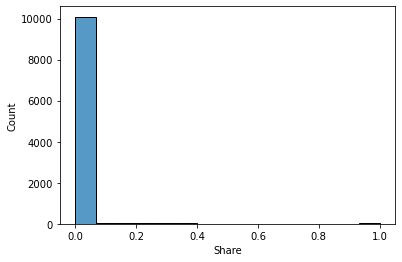

In [117]:
sns.histplot(raw_data['Share'])
plt.show()

- Most people do not get an MVP vote, only the select few, and even then, theres a difference with how close the votes are between the players that are likely to win mvp with those that are not.

#### 3.1 Correlation Matrix

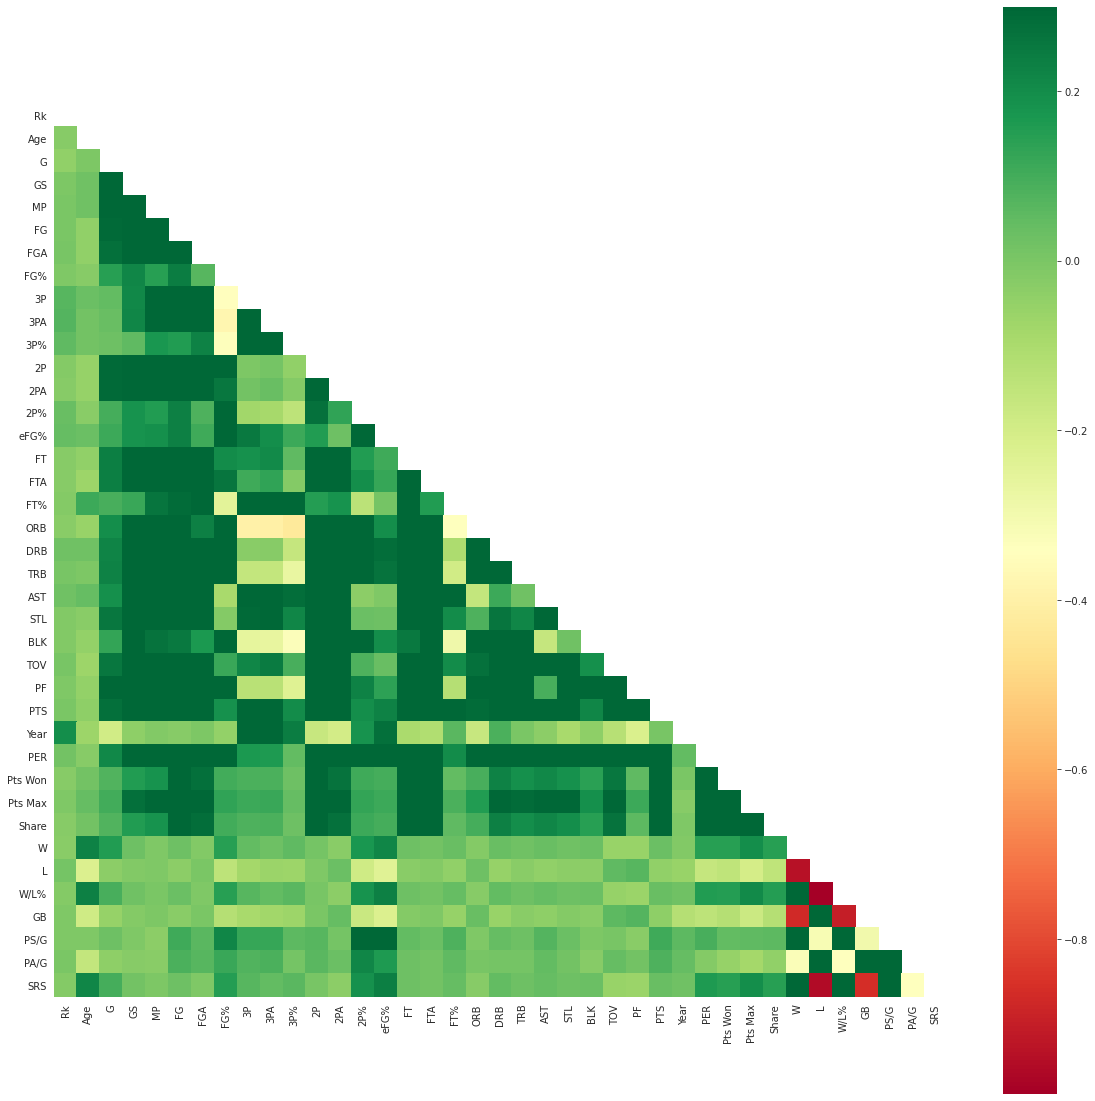

In [118]:
corr_matrix = raw_data.corr()

# plot heat map
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=.3, square=True,cmap="RdYlGn")

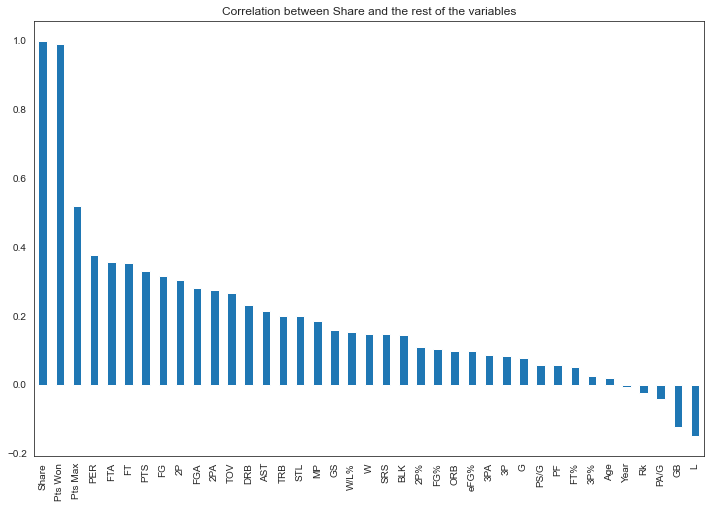

In [119]:
share_correlation = raw_data.corr()['Share'].sort_values(ascending=False)

with sns.axes_style("white"):
    plt.figure(figsize=(12,8))
    share_correlation.plot.bar()
    plt.title('Correlation between Share and the rest of the variables')
    plt.show()

The share is the variable we are trying to determine, which is calculated by the Pts Won divided by the Pts Max. Therefore, these two variables will be directly correlated and should not be used. Therefore, the statistic with the strongest correlation to the Share is the PER. From experience with watching the NBA and looking at stats in the past, I can say that the PER and the team placement in rankings are the two most important statistics. The PER is simply the player efficiency rating which takes into account the rest of the player stats to give an efficiency rating.

#### 3.2 MVP Share

In [120]:
mvp_winners = raw_data.sort_values(['Year', 'Share'], ascending=[True, False])

In [121]:
# df of mvp winners
mvp_winners = mvp_winners.groupby(['Year'], as_index=False).agg({'Player': 'first', 'Pts Won': 'first', 'Pts Max': 'first', 'Share':'first', 'PER':'first', 'W/L%':'first'})
mvp_winners = mvp_winners.sort_values('Year').head(50)
mvp_winners

,Year,Player,Pts Won,Pts Max,Share,PER,W/L%
0,1986,Larry Bird,765.0,780.0,0.981,25.6,0.817
1,1987,Magic Johnson,733.0,780.0,0.940,27.0,0.793
2,1988,Michael Jordan,665.0,800.0,0.831,31.7,0.610
3,1989,Magic Johnson,664.5,850.0,0.782,26.9,0.695
4,1990,Magic Johnson,636.0,920.0,0.691,26.6,0.768
5,1991,Michael Jordan,891.0,960.0,0.928,31.6,0.744
6,1992,Michael Jordan,900.0,960.0,0.938,27.7,0.817
7,1993,Charles Barkley,835.0,980.0,0.852,25.9,0.756
8,1994,Hakeem Olajuwon,889.0,1010.0,0.880,25.3,0.707
9,1995,David Robinson,901.0,1050.0,0.858,29.1,0.756


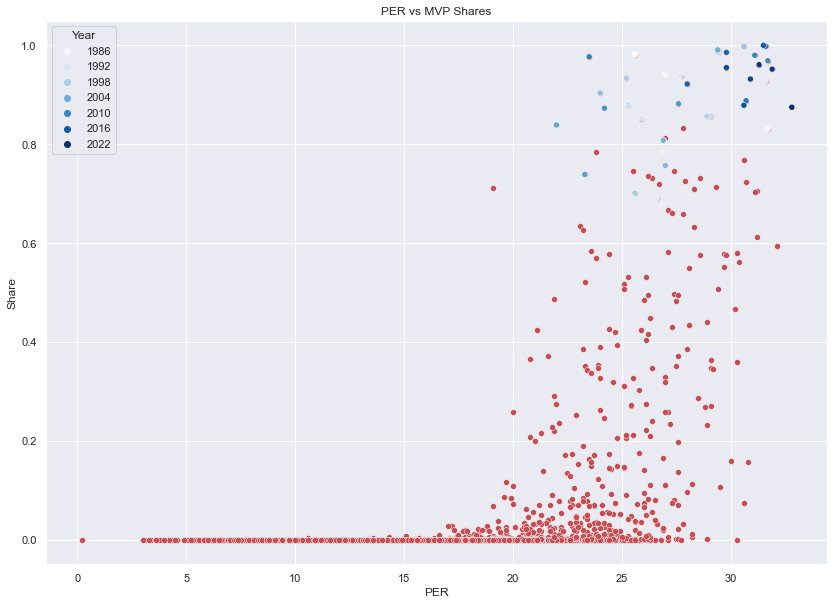

In [122]:
sns.set(rc={'figure.figsize':(14,10)})
sns.scatterplot(x='PER', y='Share', data=raw_data, color='r').set(title='PER vs MVP Shares')
sns.scatterplot(x='PER', y='Share', data=mvp_winners, color='b', hue='Year', palette='Blues')
plt.show()

It can be seen that as the MVP winners (in blue) tend to have the highest PER ratings relative to the rest of the non MVP winners (in red) which shows a strong correlation between the two. 

The PER rating was created some time in the mid 90s and became a popular metric in the early 2000s. However, looking at the chart we can see that it perhaps is used more recently than before to determine MVP.

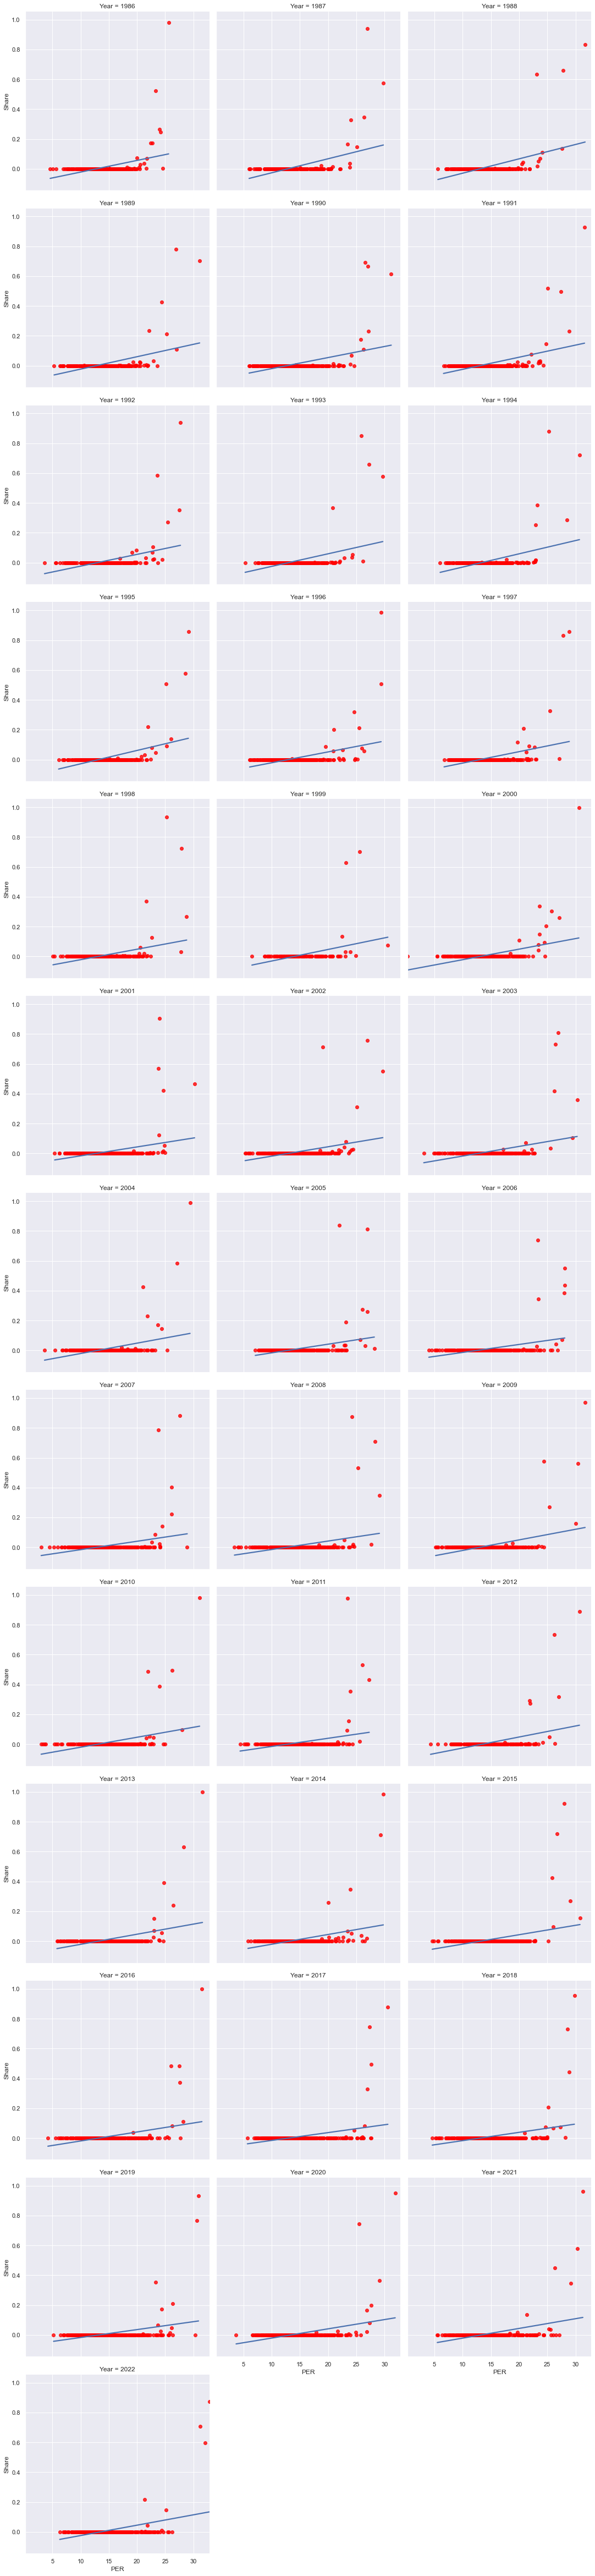

In [123]:
sns.set(rc={'figure.figsize':(14,10)})
sns.lmplot(x='PER', y='Share', data=raw_data[raw_data['Year']>1985], col='Year', col_wrap=3, scatter_kws={'color': 'red'}, ci=None)
plt.show()

As you can see, in the past 7 years, the player with the highest PER rating was the MVP. This could be that the PER is being used more to decide the MVP nowadays than it was before. This is mostly true throughout the dataset although there are a number of cases where this is not the case.

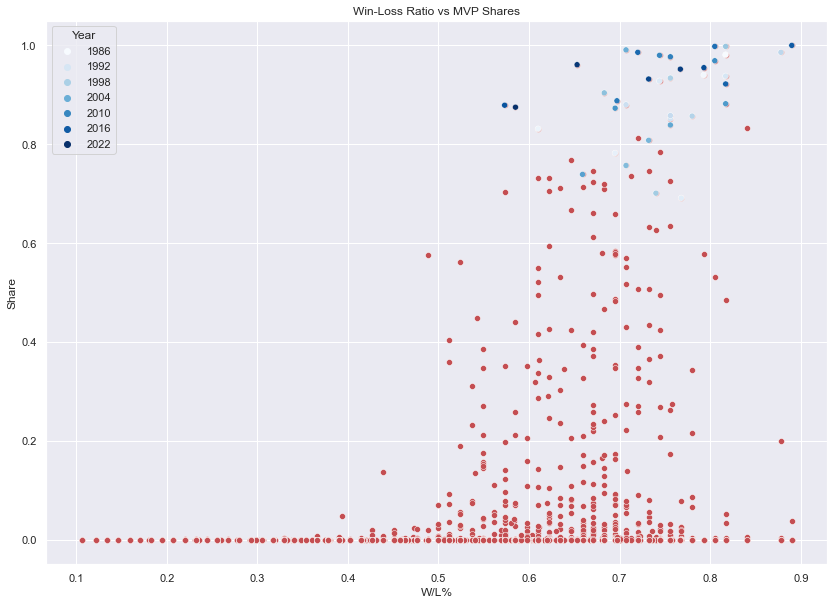

In [124]:
sns.set(rc={'figure.figsize':(14,10)})

sns.scatterplot(x='W/L%', y='Share', data=raw_data, color='r').set(title='Win-Loss Ratio vs MVP Shares')
sns.scatterplot(x='W/L%', y='Share', data=mvp_winners, color='b', hue='Year', palette='Blues')
plt.show()

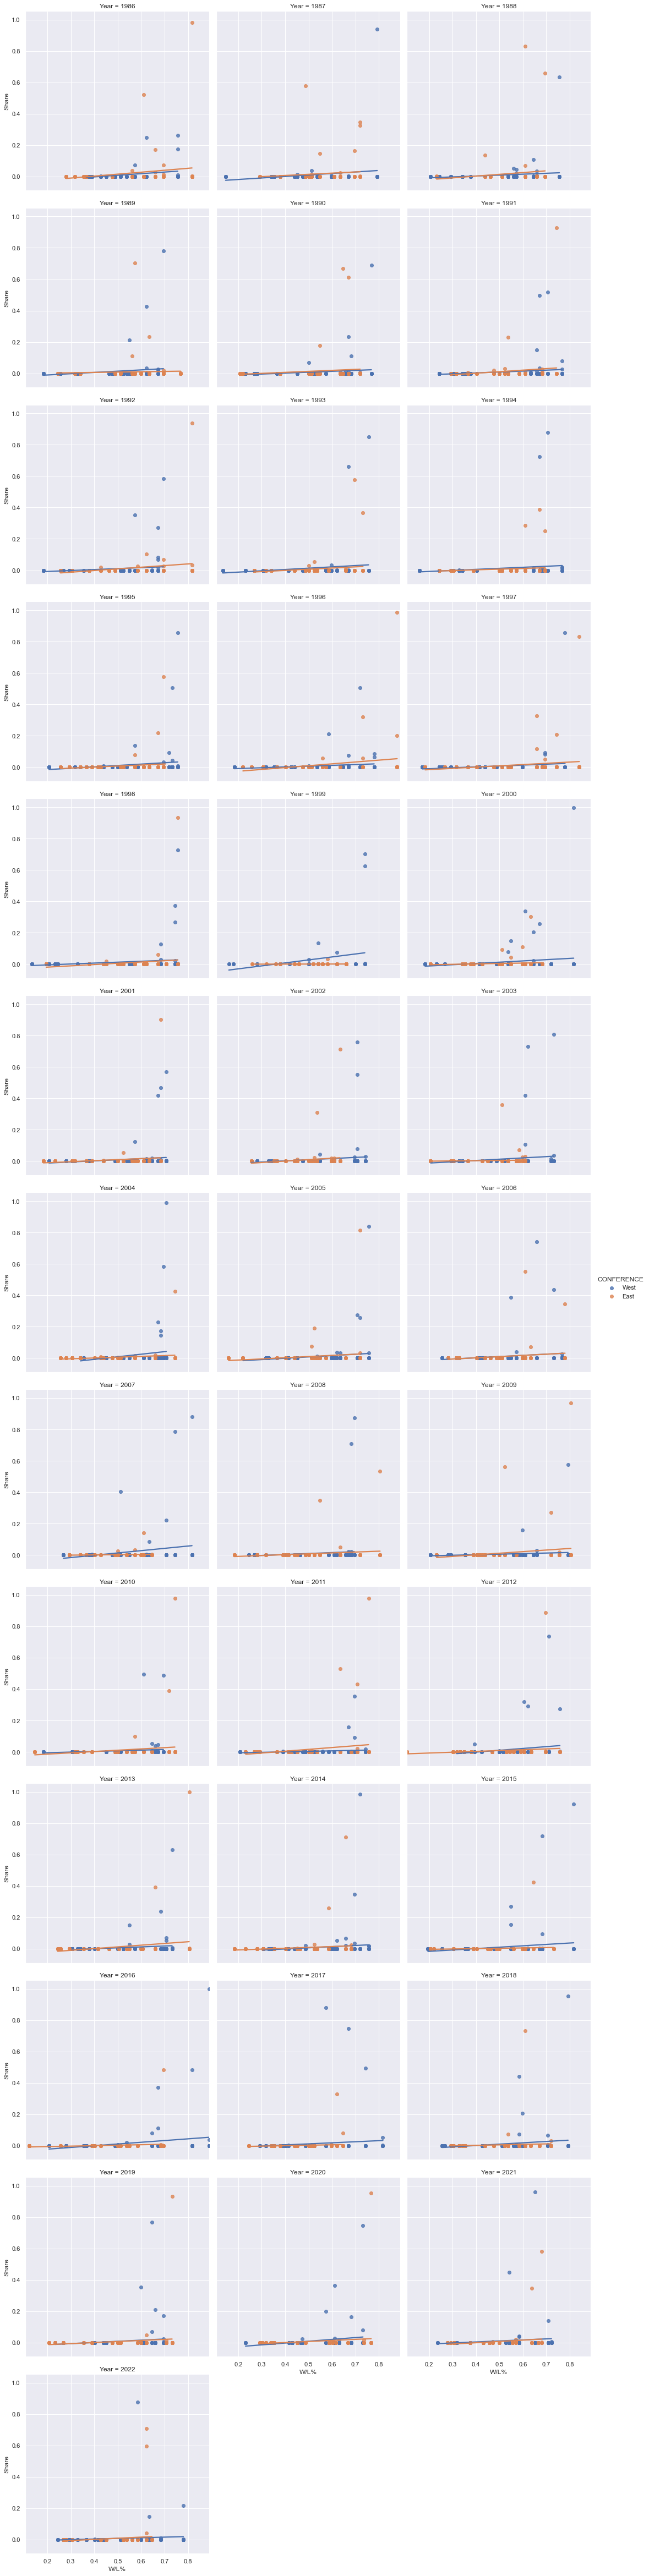

In [125]:
sns.set(rc={'figure.figsize':(14,10)})

sns.lmplot(x='W/L%', y='Share', data=raw_data[raw_data['Year']>1985], col='Year', col_wrap=3, ci=None, hue='CONFERENCE')
plt.show()

The Win-Loss Ratio is also correlated to the MVP winner, although there are exceptions in some years. For the most part, the MVP is in the top 3 teams in the rankings of their conference division.

## 4. Model

In [126]:
import warnings
warnings.filterwarnings("ignore")

### 4.1 Features and Labels

In [127]:
raw_data.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'PER', 'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS', 'CONFERENCE'], dtype='object')

The share is what is to be predicted so it is the label. The features would be everything else excluding the following variables:

- Rk 
- Player Name
- Position
- Age
- Team
- Conference
- Year

These variables have been dropped as they do not contribute to winning the MVP. Any position can win the MVP if they play well enough. Likewise, this is the same for age, team and conference.

Again, Pts Won and Pts Max are directly related to shares and hence will have to be dropped.

In [128]:
label = 'Share'
features = [
    'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', 
    '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 
    'BLK', 'TOV', 'PF','PTS', 'PER', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G','SRS'
]

### 4.2 Normalize Data

The data needs to be normalized as the scaling of the variables are different i.e. points and percentages, as well as the skew.

In [129]:
def normalize(X):
    mu = X.describe().T['mean']
    sigma = X.describe().T['std']
    X_norm = (X-mu)/sigma
    return X_norm

### 4.3 Splitting Data

As the aim of this project is to predict the MVP winner of the current season i.e. forecasting, the data will be split by having the year of prediction as testing data and the years before that as training data to prevent look ahead bias.

In [130]:
def train_test_split(year, df):
    train = df[df['Year'] < year]
    test = df[df['Year'] == year]
    
    X_train = train[features]
    y_train = train[label]
    
    X_test = test[features]
    y_test = test[label]
    
    # normalize data
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    
    return X_train, y_train, X_test, y_test, train, test

In [131]:
 X_train, y_train, X_test, y_test, train, test = train_test_split(2022, raw_data)

### 4.4 Model

In [132]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import mean_squared_error

In [133]:
random_state = 5
mymodels = {
                "Linear":LinearRegression(),
                "Lasso": Lasso(random_state = random_state),
                "Ridge": Ridge(random_state = random_state),
                "DT": DecisionTreeRegressor(random_state = random_state),
                "SVM": SVR(),
                "RF": RandomForestRegressor(random_state = random_state),
                "ADABoost": AdaBoostRegressor(random_state = random_state),
                "GradientBoost": GradientBoostingRegressor(random_state = random_state),
                "XGB": XGBRegressor(random_state = random_state)
            }

#### 4.4.1 Metrics

**Cross validation to compare RMSE**

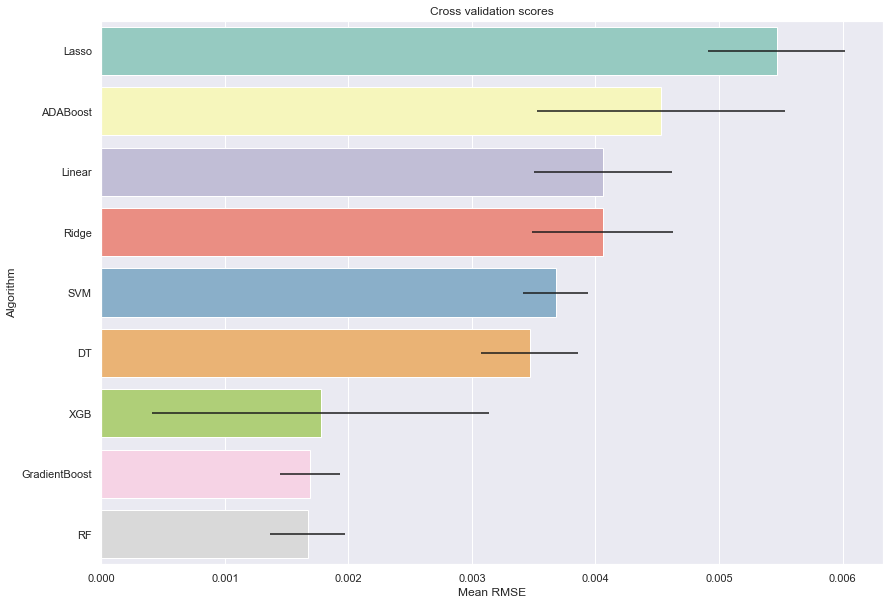

In [134]:
cv_results = []
for model_name, model in mymodels.items():
    cv_results.append(-cross_val_score(model, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_res = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Algorithm":mymodels.keys()
    })

cv_res = cv_res.sort_values('CrossValMeans', ascending=False)

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean RMSE")
g = g.set_title("Cross validation scores")

**Compare R^2 scores**

In [135]:
for model_name, model in mymodels.items():
    y_pred = model.fit(X_train, y_train).predict(X_test)
    print('='*25 ,model_name, '='*25,  ' ')
    print(f'Training score: {model.score(X_train, y_train)}')
    print(f'Test score: {model.score(X_test, y_test)}\n')

========================= Linear =========================  
Training score: 0.28067668962449477
Test score: 0.312161728468506

========================= Lasso =========================  
Training score: 0.0
Test score: -7.527853373101578e-05

========================= Ridge =========================  
Training score: 0.28057699699568595
Test score: 0.30757012217323876

========================= DT =========================  
Training score: 1.0
Test score: 0.511927473354906

========================= SVM =========================  
Training score: 0.5876977017586474
Test score: 0.49165008690267564

========================= RF =========================  
Training score: 0.9597026057617648
Test score: 0.7824933928055193

========================= ADABoost =========================  
Training score: 0.1241765311489681
Test score: 0.10666198542665795

========================= GradientBoost =========================  
Training score: 0.9219484991911735
Test score: 0.8239691581450751

===

#### 4.4.2 Modelling top regressors

- Random Forest and Gradient Boost

In [136]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

**Random Forest**

In [137]:
RF = RandomForestRegressor()

rf_param_grid = {
    "n_estimators": [20, 50, 100],
    "min_samples_leaf": [2, 5],
    "min_samples_split": [2, 5], 
    "random_state": [random_state]
}

gsRF = GridSearchCV(RF, param_grid=rf_param_grid, cv=5, verbose=1)
gsRF.fit(X_train, y_train)

RF_best = gsRF.best_estimator_
RF_best

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomForestRegressor(min_samples_leaf=2, random_state=5)

In [138]:
RF = RF_best.fit(X_train, y_train)
rf_y_pred = RF.predict(X_test)
print(f'Training score: {RF.score(X_train, y_train)}')
print(f'Test score: {RF.score(X_test, y_test)}')

Training score: 0.9402256760422079
Test score: 0.7745969506837584


**Gradient Boost**

In [139]:
GradientBoostingRegressor().get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [187]:
GB = GradientBoostingRegressor()

gb_param_grid = {
    'n_estimators': [10, 50, 100], 
    'learning_rate': [0.1, 0.01, 0.005],
    'max_depth': [3, 5],  
    'random_state': [random_state]
}

gsGB = GridSearchCV(GB, param_grid=gb_param_grid, cv=5, verbose=1)
gsGB.fit(X_train, y_train)

GB_best = gsGB.best_estimator_
GB_best

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GradientBoostingRegressor(max_depth=5, n_estimators=50, random_state=5)

- Stick to default as grid search was worse.

In [188]:
GB = GB_best.fit(X_train, y_train)
gb_y_pred = GB.predict(X_test)
print(f'Training score: {GB.score(X_train, y_train)}')
print(f'Test score: {GB.score(X_test, y_test)}')

Training score: 0.9613175475925431
Test score: 0.7407561888731706


**XGB**

In [166]:
XGBRegressor().get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [200]:
XGB = XGBRegressor()

xgb_param_grid = {
    'n_estimators': [10, 50, 100], 
    'learning_rate': [0.1, 0.01, 0.05, 0.005],
    'max_depth': [3, 5],  
    'random_state': [random_state],
    'colsample_bytree': [1, 5]
}

gsXGB = GridSearchCV(XGB, param_grid=xgb_param_grid, cv=5, verbose=1)
gsXGB.fit(X_train, y_train)

XGB_best = gsXGB.best_estimator_
XGB_best

Fitting 5 folds for each of 48 candidates, totalling 240 fits


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=5, reg_alpha=0,
             reg_lambda=1, ...)

In [201]:
XGB = XGB_best.fit(X_train, y_train)
xgb_y_pred = XGB.predict(X_test)
print(f'Training score: {XGB.score(X_train, y_train)}')
print(f'Test score: {XGB.score(X_test, y_test)}')

Training score: 0.8854292981784062
Test score: 0.775429425404604


### 4.5 Predictions

In [202]:
avg_train_sc, avg_test_sc = ([] for i in range(2))
for year in range(1987, 2023):
    X_train, y_train, X_test, y_test, train, test = train_test_split(year, raw_data)
    XGB = XGB_best.fit(X_train, y_train)

    # predictions
    predictions = XGB.predict(X_test)
    predictions = pd.DataFrame(predictions, columns=['Predictions'], index = test.index)

    # combine predictions and actual data to compare
    combination = pd.concat([test[['Year', 'Player', 'Share']], predictions], axis=1)

    # add ranking to combination df to see prediction
    combination = combination.sort_values('Share', ascending=False)
    combination['Rk'] = list(range(1,combination.shape[0]+1))

    combination = combination.sort_values('Predictions', ascending=False)
    combination['Predicted_Rk'] = list(range(1,combination.shape[0]+1))

    print(combination.sort_values('Rk', ascending=True).head(10))
    print('\n')
    
    # number of predctions correct
    tally = 0
    for index, row in combination.head(10).iterrows():
        if row['Rk'] == row['Predicted_Rk']:
            tally += 1
        else:
            continue
    print(f'Correct predictions: {tally}/10')
    print('\n')
    
    avg_train_sc.append(GB.score(X_train, y_train))
    avg_test_sc.append(GB.score(X_test, y_test))
    
print('\nAVERAGE TRAINING SCORE: {:.2f}'.format(sum(avg_train_sc) / len(avg_train_sc)))
print('AVERAGE TEST SCORE: {:.2f}'.format(sum(avg_test_sc) / len(avg_test_sc)))

      Year             Player  Share  Predictions  Rk  Predicted_Rk
16    1987      Magic Johnson  0.940     0.951706   1             2
7266  1987     Michael Jordan  0.576     0.944885   2             3
4494  1987         Larry Bird  0.347     0.952120   3             1
4493  1987       Kevin McHale  0.326     0.248202   4             4
6077  1987  Dominique Wilkins  0.164     0.206790   5             7
5028  1987    Charles Barkley  0.145     0.037824   6            10
3132  1987    Hakeem Olajuwon  0.036     0.235953   7             5
1418  1987       Isiah Thomas  0.022     0.003922   8            21
2605  1987          Fat Lever  0.014     0.010439   9            17
9506  1987       Moses Malone  0.012     0.228142  10             6


Correct predictions: 1/10


      Year             Player  Share  Predictions  Rk  Predicted_Rk
8475  1988     Michael Jordan  0.831     0.577702   1             1
6684  1988         Larry Bird  0.659     0.493446   2             2
25    1988      Ma

      Year            Player  Share  Predictions  Rk  Predicted_Rk
7673  1998    Michael Jordan  0.934     0.448361   1             2
1096  1998       Karl Malone  0.726     0.484920   2             1
803   1998       Gary Payton  0.372     0.013859   3            14
9877  1998  Shaquille O'Neal  0.268     0.263031   4             4
6926  1998        Tim Duncan  0.128     0.085413   5             5
3282  1998      Tim Hardaway  0.061     0.003223   6            25
6921  1998    David Robinson  0.031     0.339700   7             3
808   1998         Vin Baker  0.021     0.002517   8            28
7796  1998        Grant Hill  0.020     0.007989   9            22
5819  1998         Glen Rice  0.006     0.012707  10            15


Correct predictions: 2/10


       Year             Player  Share  Predictions  Rk  Predicted_Rk
1101   1999        Karl Malone  0.701     0.274852   1             2
4867   1999         Tim Duncan  0.627     0.140581   2             3
3581   1999         Jason 

      Year             Player  Share  Predictions  Rk  Predicted_Rk
3922  2010       LeBron James  0.980     0.681281   1             1
6236  2010       Kevin Durant  0.495     0.439263   2             2
1165  2010        Kobe Bryant  0.487     0.125364   3             5
5736  2010      Dwight Howard  0.389     0.371557   4             3
9331  2010        Dwyane Wade  0.097     0.123486   5             6
5487  2010    Carmelo Anthony  0.053     0.180395   6             4
8726  2010      Dirk Nowitzki  0.045     0.023058   7            10
3710  2010         Steve Nash  0.040     0.043977   8             7
4632  2010     Deron Williams  0.006     0.035341   9             8
3701  2010  Amar'e Stoudemire  0.004     0.025695  10             9


Correct predictions: 2/10


      Year             Player  Share  Predictions  Rk  Predicted_Rk
8944  2011       Derrick Rose  0.977     0.365771   1             4
8522  2011      Dwight Howard  0.531     0.417956   2             3
9583  2011       L

      Year                 Player  Share  Predictions  Rk  Predicted_Rk
460   2022           Nikola Jokić  0.875     0.489887   1             1
560   2022            Joel Embiid  0.706     0.380374   2             3
8152  2022  Giannis Antetokounmpo  0.595     0.480868   3             2
597   2022           Devin Booker  0.216     0.072180   4             9
8021  2022            Luka Dončić  0.146     0.147386   5             5
756   2022           Jayson Tatum  0.043     0.015783   6            13
8543  2022              Ja Morant  0.010     0.229423   7             4
4286  2022          Stephen Curry  0.004     0.022714   8            11
595   2022             Chris Paul  0.002     0.002180   9            46
4154  2022           Kevin Durant  0.001     0.125464  10             6


Correct predictions: 2/10



AVERAGE TRAINING SCORE: 0.89
AVERAGE TEST SCORE: 0.77


- Most important prediction is whether the algorithm predicted the correct MVP.

In [203]:
def run_model(regressor, start_year, end_year, data):
    mvp_comparison = []

    for year in range(start_year, end_year):
        X_train, y_train, X_test, y_test, train, test = train_test_split(year, data)
        model = regressor.fit(X_train, y_train)

        # predictions
        predictions = model.predict(X_test)
        predictions = pd.DataFrame(predictions, columns=['Predictions'], index = test.index)

        # combine predictions and actual data to compare
        combination = pd.concat([test[['Year', 'Player', 'Share']], predictions], axis=1)

        # add ranking to combination df to see prediction
        combination = combination.sort_values('Share', ascending=False)
        combination['Rk'] = list(range(1,combination.shape[0]+1))

        combination = combination.sort_values('Predictions', ascending=False)
        combination['Predicted_Rk'] = list(range(1,combination.shape[0]+1))
        
        # prediction of mvp
        predicted_winner = combination['Player'][0:1]
        
        combination = combination.sort_values('Rk')
        combination['Predicted Winner'] = predicted_winner
        combination.iloc[0:1, -1] = predicted_winner
        
        combination = combination[0:12]
        mvp_comparison.append(combination[0:1])
        
        # number of predctions correct
        tally = 0
        for index, row in combination.head(10).iterrows():
            if row['Rk'] == row['Predicted_Rk']:
                tally += 1
            else:
                continue
    
    return mvp_comparison

**GradientBoost**

In [204]:
# ML model
mvp_comparison = run_model(GB, 1987, 2023, raw_data)

# Prediction Table
mvp_comparison = pd.concat(mvp_comparison)
mvp_comparison = mvp_comparison.reset_index(drop=True)

# add ranking of predicted winner
predicted_winner_rk = []
for index, row in mvp_comparison.iterrows():
    predicted_winner_rk.append(mvps[(mvps['Player'] == row[-1]) & (mvps['Year'] == row[0])].iloc[0,-1])
z = pd.DataFrame(predicted_winner_rk, columns=['Predicted Winner Rk'])
mvp_comparison['Predicted Winner Rk'] = z

# Accuracy
accuracy = (mvp_comparison[mvp_comparison['Predicted_Rk'] == 1]['Predicted_Rk'].sum())/len(mvp_comparison['Predicted_Rk'])
print('\nMVP PREDICTION: {:.2f}'.format(accuracy))
gb_prediction = mvp_comparison
gb_prediction


MVP PREDICTION: 0.61


,Year,Player,Share,Predictions,Rk,Predicted_Rk,Predicted Winner,Predicted Winner Rk
0,1987,Magic Johnson,0.940,0.976002,1,1,Magic Johnson,1
1,1988,Michael Jordan,0.831,0.511340,1,1,Michael Jordan,1
2,1989,Magic Johnson,0.782,0.596640,1,2,Charles Barkley,6
3,1990,Magic Johnson,0.691,0.782813,1,2,Charles Barkley,2
4,1991,Michael Jordan,0.928,0.656683,1,1,Michael Jordan,1
5,1992,Michael Jordan,0.938,0.945602,1,1,Michael Jordan,1
6,1993,Charles Barkley,0.852,0.613414,1,2,Michael Jordan,3
7,1994,Hakeem Olajuwon,0.880,0.301703,1,4,David Robinson,2
8,1995,David Robinson,0.858,0.895086,1,2,Karl Malone,3
9,1996,Michael Jordan,0.986,0.926623,1,1,Michael Jordan,1


**RandomForest**

In [205]:
# ML model
mvp_comparison = run_model(RF, 1987, 2023, raw_data)

# Prediction Table
mvp_comparison = pd.concat(mvp_comparison)
mvp_comparison = mvp_comparison.reset_index(drop=True)

# add ranking of predicted winner
predicted_winner_rk = []
for index, row in mvp_comparison.iterrows():
    predicted_winner_rk.append(mvps[(mvps['Player'] == row[-1]) & (mvps['Year'] == row[0])].iloc[0,-1])
z = pd.DataFrame(predicted_winner_rk, columns=['Predicted Winner Rk'])
mvp_comparison['Predicted Winner Rk'] = z

# Accuracy
accuracy = (mvp_comparison[mvp_comparison['Predicted_Rk'] == 1]['Predicted_Rk'].sum())/len(mvp_comparison['Predicted_Rk'])
print('\nMVP PREDICTION: {:.2f}'.format(accuracy))
rf_prediction = mvp_comparison
rf_prediction


MVP PREDICTION: 0.61


,Year,Player,Share,Predictions,Rk,Predicted_Rk,Predicted Winner,Predicted Winner Rk
0,1987,Magic Johnson,0.940,0.351324,1,5,Larry Bird,3
1,1988,Michael Jordan,0.831,0.625090,1,1,Michael Jordan,1
2,1989,Magic Johnson,0.782,0.517871,1,2,Michael Jordan,2
3,1990,Magic Johnson,0.691,0.598846,1,3,Michael Jordan,3
4,1991,Michael Jordan,0.928,0.742191,1,1,Michael Jordan,1
5,1992,Michael Jordan,0.938,0.814701,1,1,Michael Jordan,1
6,1993,Charles Barkley,0.852,0.491334,1,2,Michael Jordan,3
7,1994,Hakeem Olajuwon,0.880,0.466844,1,3,David Robinson,2
8,1995,David Robinson,0.858,0.756204,1,1,David Robinson,1
9,1996,Michael Jordan,0.986,0.906089,1,1,Michael Jordan,1


**XGB**

In [206]:
# ML model
mvp_comparison = run_model(XGB, 1987, 2023, raw_data)

# Prediction Table
mvp_comparison = pd.concat(mvp_comparison)
mvp_comparison = mvp_comparison.reset_index(drop=True)

# add ranking of predicted winner
predicted_winner_rk = []
for index, row in mvp_comparison.iterrows():
    predicted_winner_rk.append(mvps[(mvps['Player'] == row[-1]) & (mvps['Year'] == row[0])].iloc[0,-1])
z = pd.DataFrame(predicted_winner_rk, columns=['Predicted Winner Rk'])
mvp_comparison['Predicted Winner Rk'] = z

# Accuracy
accuracy = (mvp_comparison[mvp_comparison['Predicted_Rk'] == 1]['Predicted_Rk'].sum())/len(mvp_comparison['Predicted_Rk'])
print('\nMVP PREDICTION: {:.2f}'.format(accuracy))
xgb_prediction = mvp_comparison
xgb_prediction


MVP PREDICTION: 0.64


,Year,Player,Share,Predictions,Rk,Predicted_Rk,Predicted Winner,Predicted Winner Rk
0,1987,Magic Johnson,0.940,0.951706,1,2,Larry Bird,3
1,1988,Michael Jordan,0.831,0.577702,1,1,Michael Jordan,1
2,1989,Magic Johnson,0.782,0.644385,1,1,Magic Johnson,1
3,1990,Magic Johnson,0.691,0.888711,1,1,Magic Johnson,1
4,1991,Michael Jordan,0.928,0.904617,1,1,Michael Jordan,1
5,1992,Michael Jordan,0.938,0.896720,1,1,Michael Jordan,1
6,1993,Charles Barkley,0.852,0.437196,1,2,Michael Jordan,3
7,1994,Hakeem Olajuwon,0.880,0.587561,1,2,David Robinson,2
8,1995,David Robinson,0.858,0.794562,1,1,David Robinson,1
9,1996,Michael Jordan,0.986,0.816646,1,1,Michael Jordan,1


### 4.6 Combining models

- XGB and GradientBoost seem to predict different correct MVPs and hence, by combining the two models, the best prediction can be made.

In [208]:
# initiliasing columns
gb_prediction.columns = ['Year', 'Player', 'Share', 'Predictions', 'Rk', 'Predicted_Rk_gb', 'Predicted_Winner_gb', 'Predicted_Winner_Rk_gb']
xgb_prediction.columns = ['Year', 'Player', 'Share', 'Predictions', 'Rk', 'Predicted_Rk_xgb', 'Predicted_Winner_xgb', 'Predicted_Winner_Rk_xgb']


def compare_rankings(df):
    if df['Predicted_Rk_xgb'] > df['Predicted_Rk_gb']:
        df['Final_Predicted_Rk'] = df['Predicted_Rk_gb']
        df['Final_Predicted_Winner'] = df['Predicted_Winner_gb']
    else:
        df['Final_Predicted_Rk'] = df['Predicted_Rk_xgb']
        df['Final_Predicted_Winner'] = df['Predicted_Winner_xgb']

    return df

def combining_models(model_1, model_2):
    # concat two model df
    both_models = pd.concat([model_1, model_2], axis=1)
    both_models = both_models.loc[:,~both_models.columns.duplicated()]
    
    both_models = both_models.apply(lambda x: compare_rankings(x), axis=1)

    # compare rankings
    final_comparison = both_models[['Year', 'Player', 'Share', 'Predictions', 'Rk', 'Final_Predicted_Rk', 'Final_Predicted_Winner']]
    
    # accuracy 
    both_models_accuracy = (both_models[both_models['Final_Predicted_Rk'] == 1]['Final_Predicted_Rk'].sum())/len(both_models['Final_Predicted_Rk'])
    print(f'The accuracy of both models combined is {both_models_accuracy}')
    
    return final_comparison

combining_models(gb_prediction, xgb_prediction)

The accuracy of both models combined is 0.7222222222222222


,Year,Player,Share,Predictions,Rk,Final_Predicted_Rk,Final_Predicted_Winner
0,1987,Magic Johnson,0.940,0.976002,1,1,Magic Johnson
1,1988,Michael Jordan,0.831,0.511340,1,1,Michael Jordan
2,1989,Magic Johnson,0.782,0.596640,1,1,Magic Johnson
3,1990,Magic Johnson,0.691,0.782813,1,1,Magic Johnson
4,1991,Michael Jordan,0.928,0.656683,1,1,Michael Jordan
5,1992,Michael Jordan,0.938,0.945602,1,1,Michael Jordan
6,1993,Charles Barkley,0.852,0.613414,1,2,Michael Jordan
7,1994,Hakeem Olajuwon,0.880,0.301703,1,2,David Robinson
8,1995,David Robinson,0.858,0.895086,1,1,David Robinson
9,1996,Michael Jordan,0.986,0.926623,1,1,Michael Jordan


### 4.7 Evaluation

General:

- The model works by predicting the MVP of each year using data from the previous years. Hence, the latest the year, the most data it will have and most likely to be more accurate. 

- The XGB regressor had the best training testing score with around .77 testing score. It came up with the most predictions of MVP right with .64 compared to the random forest regressor and gradient boost regressor of around .61. 

- By combining the two best models, a prediction of around .72 of MVP's were predicted correct. This is fairly good considering the nature of the project whereby predicting an award in sports in difficult due to bias and other narratives that go into deciding such an award. Some players may be more deserving than others and may not win it due to factors outside of statistics.

- The predictions within the last ten years are the most accurate and I believe it has to do with the way the MVP judging has changed over the years. Ever since the PER metric was created in the 2000s, I feel like as time passed, it became more significant in deciding who is MVP alongside team placement.

- Looking at opinions of NBA fans and what they think about some of the MVP winners, it is clear that the opinions are mixed and there are a lot of disagreements with the actual winners.

Future Improvements:

- Try to incorporate more advanced NBA statistics that are out there and perhaps maybe more feature engineering.

**END**